In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt
import csv

In [2]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [3]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC').dt.tz_convert('US/Central')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-11-30 23:33:00-06:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-11-30 23:34:00-06:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-11-30 23:35:00-06:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-11-30 23:36:00-06:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-11-30 23:37:00-06:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [4]:
#Convert Timestamp into separate Date and Time
#temp = pd.DatetimeIndex(df['Timestamp']) #Gather all datetime objects
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

del df['Timestamp'] #Delete original datetime column

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
0,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30,23:33:00
1,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30,23:34:00
2,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30,23:35:00
3,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30,23:36:00
4,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30,23:37:00


In [5]:
price=df['Close']

In [6]:
min_periods = 43200

# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Average']=mean
df['Volatility']=vol
df['SD']=sd
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1686589,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667,2018-03-26,18:56:00,9434.270142,232584.323674,1119.021849
1686590,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865,2018-03-26,18:57:00,9434.234424,232587.698813,1119.038088
1686591,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628,2018-03-26,18:58:00,9434.198808,232591.105101,1119.054476
1686592,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847,2018-03-26,18:59:00,9434.163076,232594.538752,1119.070996
1686593,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384,2018-03-26,19:00:00,9434.127729,232598.022532,1119.087758


In [7]:
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('01/26/18', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('03/26/18', '%x'))].index[0]
df_1= df.loc[index_1:index_2]
#df_1= df.loc[index_1:,]
df_1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1600553,11287.81,11287.81,11287.00,11287.81,0.866393,9779.678656,11287.803996,2018-01-26,00:00:00,13471.584762,364572.486068,1754.050191
1600554,11287.81,11300.00,11287.80,11299.99,8.641376,97593.427011,11293.736353,2018-01-26,00:01:00,13471.465592,364566.801929,1754.022844
1600555,11300.00,11300.00,11299.99,11299.99,2.277560,25736.422678,11299.998507,2018-01-26,00:02:00,13471.345919,364560.937442,1753.994628
1600556,11299.99,11300.00,11299.99,11299.99,1.890111,21358.241090,11299.990440,2018-01-26,00:03:00,13471.226243,364555.070259,1753.966400
1600557,11300.00,11300.00,11299.99,11300.00,0.592582,6696.175523,11299.994941,2018-01-26,00:04:00,13471.106358,364549.127074,1753.937805


In [8]:
df_2=df_1.groupby(df_1.Date).mean()
df_2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD
Date,,,,,,,,,,
2018-01-26,10912.618229,10919.615542,10904.882729,10912.501396,12.666565,137594.579238,10912.238610,13391.937459,365925.664329,1760.560673
2018-01-27,11256.354188,11261.054139,11251.755153,11256.590549,8.512924,96307.176125,11256.546039,13274.007124,372106.837790,1790.299858
2018-01-28,11415.597597,11419.740056,11411.933625,11415.419833,9.111505,104133.729620,11415.596588,13172.588954,375659.075830,1807.390571
2018-01-29,11051.354451,11054.576479,11047.606993,11051.118188,7.716528,85120.290367,11051.078433,13082.981115,380918.896068,1832.696893
2018-01-30,10332.621687,10341.449132,10322.702083,10331.871354,23.278908,234731.869499,10332.135333,13001.104688,390127.060909,1876.999697


In [9]:
marker=[]
avechange=[]
sdchange=[]
for i in range(len(df_2)-1):
    avediff=(df_2['Average'].iloc[i+1]-df_2['Average'].iloc[i])/df_2['Average'].iloc[i]
    sddiff=(df_2['SD'].iloc[i+1]-df_2['SD'].iloc[i])/df_2['SD'].iloc[i]
    avechange.append(avediff)
    sdchange.append(sddiff)
   # if abs(avechange[i]) > 2*(df_2['SD'].iloc[i]):
    if abs(avechange[i]) > 2*(sdchange[i]):
        marker.append(df_2.index[i])   

In [10]:
marker

[datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 4),
 datetime.date(2018, 2, 5),
 datetime.date(2018, 2, 6),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 11),
 datetime.date(2018, 2, 12),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 15),
 datetime.date(2018, 2, 16),
 datetime.date(2018, 2, 17),
 datetime.date(2018, 2, 18),
 datetime.date(2018, 2, 19),
 datetime.date(2018, 2, 20),
 datetime.date(2018, 2, 21),
 datetime.date(2018, 2, 22),
 datetime.date(2018, 2, 23),
 datetime.date(2018, 2, 24),
 datetime.date(2018, 2, 25),
 datetime.date(2018, 2, 26),
 datetime.date(2018, 2, 27),
 datetime.date(2018, 2, 28),
 datetime.date(2018, 3, 6),
 datetime.date(2018, 3, 7),
 datetime.date(2018, 3, 8),
 datetime.date(2018, 3, 9),
 datetime.date(2018, 3, 10),
 datetime.date(2018, 3, 11),
 datetime.date(2018, 3, 12),
 datetime.date(2018, 3, 13),
 datetime.date(2018, 3, 2

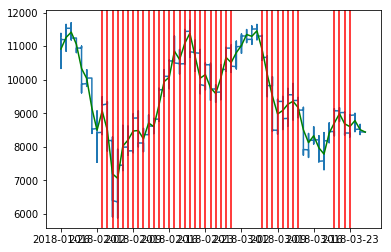

In [12]:
plt.plot(df_1.Date,df_1.Weighted_Price)
plt.plot(df_2.index,df_2.Weighted_Price,c='g')
for xc in marker:
    plt.axvline(x=xc,c='r')
plt.show()

In [13]:
df = pd.DataFrame({'Date':marker})
df.to_csv('marker.csv',index=False)